In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [5]:
from google.colab import drive


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
con=sqlite3.connect('database.sqlite')
#print(con)
import os
os.getcwd()
os.listdir()



['.config', 'drive', 'database.sqlite', 'datbase.sqlite', 'sample_data']

In [8]:
con=sqlite3.connect('datbase.sqlite')

In [9]:
con_rev = pd.read_csv('/content/drive/MyDrive/Reviews.csv')
print(con_rev.shape)
con_rev.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
filtered_data= con_rev[con_rev['Score']!=3]
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
def partition(x):
  if x<3:
    return 0
  return 1

In [12]:
actualScore=filtered_data['Score']
positiveNegative = actualScore.map(partition)
filtered_data['Score']=positiveNegative
print('number of data points in our data',filtered_data.shape)
filtered_data.head(3)

number of data points in our data (525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [13]:
subset={'UserId', 'ProfileName','Time','Text'}
data=filtered_data.drop_duplicates(subset=subset, keep='first')
print(data.shape)
data.head(3)

(364173, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [14]:
(data['Id'].size)/(filtered_data['Id'].size)*100

69.25890143662969

In [15]:
data[data['HelpfulnessNumerator']>data['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [16]:
data=data[data['HelpfulnessNumerator']<=data['HelpfulnessDenominator']]
data.reset_index(drop =True, inplace=True)
print(data.shape)
data.head(3)

(364171, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [17]:
mis_val=data.isna().sum()
mis_val

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    1
Text                       0
dtype: int64

1    307061
0     57110
Name: Score, dtype: int64
**************************************************


Text(0.5, 1.0, 'Score distribution')

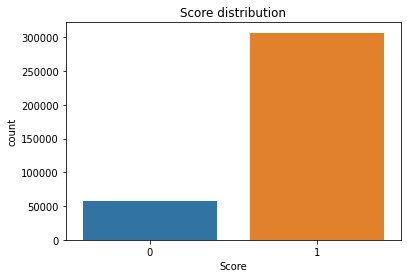

In [18]:
print(data['Score'].value_counts())
print("*"*50)
sns.countplot('Score',data=data)
plt.title('Score distribution')

In [19]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

sno=nltk.stem.SnowballStemmer('english')

def cleanhtml(sentence):
  cleanr=re.compile('<.*?>')
  cleantext=re.sub(cleanr,' ',sentence)
  return cleantext
def cleanpunc(sentence):
  cleaned=re.sub(r'[?|!|\'|"|#]',r'',sentence)
  cleaned=re.sub(r'[.|,|)|(|\|/]',r'',cleaned)
  return cleaned

  
def final_sentence(text):
  text=text.split()
  text=[cleanhtml(x) for x in text]
  text=[cleanpunc(x) for x in text]
  def test(word):
    if word.isalpha() and len(word)>2 and word.lower() not in stop:
      return True
    else:
      return False

  text = [x for x in text if test(x)]

  return ' '.join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
364166    Great for sesame chicken..this is a good if no...
364167    I'm disappointed with the flavor. The chocolat...
364168    These stars are small, so you can give 10-15 o...
364169    These are the BEST treats for training and rew...
364170    I am very satisfied ,product is as advertised,...
Name: Text, Length: 364171, dtype: object

In [21]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [22]:
data['cleanedtext'] = data['Text'].apply(final_sentence)
print(data.shape)
data.head()

(364171, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleanedtext
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several Vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted Peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient Robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy great price wide assortment yummy ...


In [23]:
def Text_Into_Vector(model,data):
  model_vect=model(ngram_range=(1,2))
  final_array=model_vect.fit_transform(data.values)

  print('The type of count vectorizer',type(final_array))
  print("The shape of out text BOW vectorizer",final_array.get_shape())
  print("The number of unique words including both unigrams and bigrams",final_array.get_shape()[1])
  return model_vect, final_array

In [24]:
from sklearn.model_selection import train_test_split
def Split_data(x_vec,y_vec):
  X_train,X_test,y_train,y_test=train_test_split(x_vec,y_vec,test_size=0.33,random_state=0)
  x_tr,X_cv,Y_tr,Y_cv=train_test_split(X_train,y_train,test_size=0.33, random_state=0)
  return x_tr,X_cv,X_test,Y_tr,y_test,Y_cv,X_train,y_train

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
def Normalization(train,cv,test):
  train=preprocessing.normalize(train)
  cv=preprocessing.normalize(cv)
  test=preprocessing.normalize(test)

  print("Train Data Size", train.get_shape())
  print("CV data Size",cv.shape)
  print("Test Data Size",test.shape)
  return train,cv,test

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


def Multinomial_NB(X_train,X_cv,Y_train,Y_cv):
  best_alpha=0
  max_roc_auc=-1
  pred_cv=[]
  pred_train=[]
  alpha=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
  for i in alpha:
    mulbnb=MultinomialNB(alpha=i)
    mulbnb.fit(X_train,Y_train)
    probs = mulbnb.predict_proba(X_cv)[:,1]
    prob = mulbnb.predict_proba(X_train)[:,1]

    auc_score_cv=roc_auc_score(Y_cv,probs)
    auc_score_train=roc_auc_score(Y_train,prob)

    print(i,"----->",auc_score_cv)

    pred_cv.append(auc_score_cv)
    pred_train.append(auc_score_train)

    if(max_roc_auc<auc_score_cv):
      max_roc_auc=auc_score_cv
      best_alpha=i
  print("*"*100)
  print(f"\n Best alpha Value{best_alpha} with highest roc+auc_score is{max_roc_auc}")
  print("*"*100)

  sns.set_style("darkgrid")
  plt.xscale("log")
  plt.plot(alpha,pred_cv,'r-',label='cv Data')
  plt.plot(alpha,pred_train,'g-','label=Train Data')
  plt.legend(loc='upper right')
  plt.xlabel(r"alpha values",fontsize=12)
  plt.ylabel("roc_auc",fontsize=12)
  plt.show()
  print("*"*100)

  fpr, tpr, thresholds = roc_curve(Y_cv,probs)
  plt.plot([0,1],[0,1],linestyle='--')
  plt.plot(fpr,tpr,marker=".")
  plt.title("line plot of ROC Curve on Train Data")
  plt.xlabel('False positive Rate')
  plt.ylabel('True positive Rate')
  plt.show()
  print("*"*100)

  return best_alpha


In [27]:
 pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import scikitplot.metrics as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def Testing_model(X_train,Y_train,X_test,Y_test,best_alpha):
  bnb = MultinomialNB(alpha=best_alpha,fit_prior=True,class_prior=None)
  bnb.fit(X_train,Y_train)
  probs=bnb.predict_proba(X_test)[:,1]
  roc_auc=roc_auc_score(Y_test,probs)
  print("AUC Score",roc_auc)
  print("*"*70)
  ###############
  fpr,tpr,thresholds = roc_curve(Y_test,probs)
  plt.plot([0,1],[0,1], linestyle='--')
  plt.plot(fpr,tpr, marker='.')
  plt.title("line plot of ROC curve on test data")
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.show()
  prediction=bnb.predict(X_test)
  skplt.plot_confusion_matrix(Y_test,prediction)
  print("macro f1_score for data :",metrics.f1_score(Y_test,prediction,average='macro'))
  print('micro f1_score for data:',metrics.f1_score(Y_test,prediction,average='micro'))
  print("hamming loss for data:",metrics.hamming_loss(Y_test,prediction))
  print("*"*70)
  print('precision recall report for data:\n',metrics.classification_report(Y_test,prediction))
  print("*"*70)
  return bnb,roc_auc

In [29]:
def Important_features(model, classifier):
  neg=classifier.feature_log_prob_[0].argsort()
  pos=classifier.feature_log_prob_[1].argsort()
  top_pos_words=np.take(model.get_feature_names(),pos)
  top_neg_words=np.take(model.get_feature_names(),neg)
  imp_df = pd.DataFrame(columns = ['Pos_words','Pos_Importance','Neg_Importance'])
  imp_df['Pos_words']=top_pos_words[::-1]
  imp_df['Pos_Importance']=np.take(classifier.feature_log_prob_[1],pos)[::-1]
  imp_df['Neg_words']=top_neg_words[::-1]
  imp_df['Neg_Importance']=np.take(classifier.feature_log_prob_[0],neg)[::-1]
  return imp_df

In [30]:
def Individual_prediction(model,classifier,review):
  review=final_sentence(review)
  review_vec=model.transform([review])
  review_vec=preprocessing.normalize(review_vec)
  pred=classifier.predict(review_vec)
  return "positive review" if pred[0]==1 else "negative review"

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
BOW, X = Text_Into_Vector(CountVectorizer,data['cleanedtext'])

The type of count vectorizer <class 'scipy.sparse.csr.csr_matrix'>
The shape of out text BOW vectorizer (364171, 4053499)
The number of unique words including both unigrams and bigrams 4053499


In [32]:
BOW.get_feature_names()[:20]

['aaa',
 'aaa aaa',
 'aaa class',
 'aaa condition',
 'aaa dont',
 'aaa hockey',
 'aaa job',
 'aaa magazine',
 'aaa perfection',
 'aaa plus',
 'aaa rating',
 'aaa spelt',
 'aaa tue',
 'aaaa',
 'aaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaaargh waited',
 'aaaaaaaaagghh',
 'aaaaaaah',
 'aaaaaaah good',
 'aaaaaaahhhhhh']

In [33]:
BOW.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [34]:
X_tr,X_cv,X_test,Y_tr,Y_test,Y_cv,x_train,y_train=Split_data(X,data['Score'])

# Nouvelle section

In [35]:
print('X_test_test,Y_test',X_test.shape,Y_test.shape)
print('x_tr,y_tr',X_tr.shape,Y_tr.shape)
print('x_cv,y_cv',X_cv.shape,Y_cv.shape)
print('x_train,y_train',x_train.shape,y_train.shape)

X_test_test,Y_test (120177, 4053499) (120177,)
x_tr,y_tr (163475, 4053499) (163475,)
x_cv,y_cv (80519, 4053499) (80519,)
x_train,y_train (243994, 4053499) (243994,)


In [36]:
X_tr,X_cv,X_test=Normalization(X_tr,X_cv,X_test)

Train Data Size (163475, 4053499)
CV data Size (80519, 4053499)
Test Data Size (120177, 4053499)


10000 -----> 0.6204729408052135
5000 -----> 0.6244443113297187
1000 -----> 0.6411908687195509
500 -----> 0.6505875209999895
100 -----> 0.674849437854583
50 -----> 0.6866722860568053
10 -----> 0.7174586343282986
5 -----> 0.7329403629412539
1 -----> 0.7843243122170873
0.5 -----> 0.8195894355879612
0.1 -----> 0.9147996902738524
0.05 -----> 0.9314487133555648
0.01 -----> 0.9331470099027048
0.005 -----> 0.9322415438152604
0.001 -----> 0.9284055956365972
0.0005 -----> 0.9252654778570832
0.0001 -----> 0.9153180975245269
5e-05 -----> 0.910377365373483
1e-05 -----> 0.8985057435450383
****************************************************************************************************

 Best alpha Value0.01 with highest roc+auc_score is0.9331470099027048
****************************************************************************************************


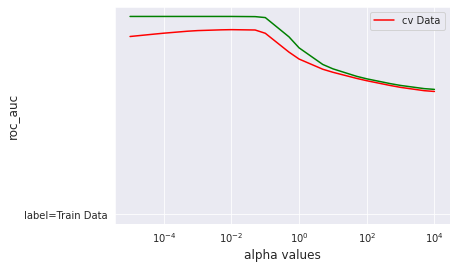

****************************************************************************************************


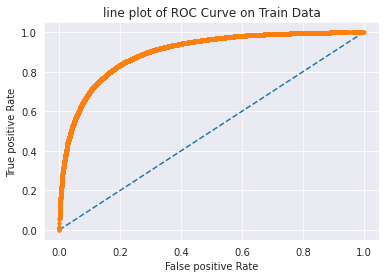

****************************************************************************************************


In [37]:
best_alpha_bow=Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)

AUC Score 0.9337847112241919
**********************************************************************


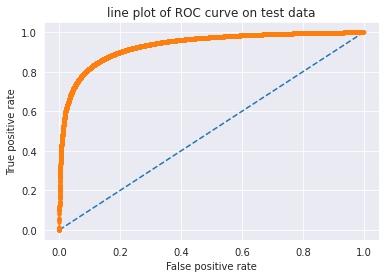

macro f1_score for data : 0.8094570345002758
micro f1_score for data: 0.9048070762292284
hamming loss for data: 0.09519292377077145
**********************************************************************
precision recall report for data:
               precision    recall  f1-score   support

           0       0.73      0.63      0.67     18834
           1       0.93      0.96      0.94    101343

    accuracy                           0.90    120177
   macro avg       0.83      0.79      0.81    120177
weighted avg       0.90      0.90      0.90    120177

**********************************************************************


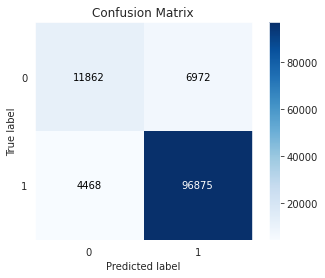

In [38]:
NB_bow,roc_auc_bow=Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_bow)

In [39]:
Important_features(BOW,NB_bow)

,Pos_words,Pos_Importance,Neg_Importance,Neg_words
0,great,-5.190362,-5.158689,like
1,like,-5.223459,-5.394794,product
2,good,-5.228335,-5.430332,taste
3,love,-5.532103,-5.675647,one
4,product,-5.591620,-5.685495,would
...,...,...,...,...
4053494,things beg,-18.466146,-16.976666,person portions
4053495,lease amount,-18.466146,-16.976666,person pork
4053496,things began,-18.466146,-16.976666,person popped
4053497,leas strawberry,-18.466146,-16.976666,person popcorn


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfIdf, X=Text_Into_Vector(TfidfVectorizer,data['cleanedtext'])

The type of count vectorizer <class 'scipy.sparse.csr.csr_matrix'>
The shape of out text BOW vectorizer (364171, 4053499)
The number of unique words including both unigrams and bigrams 4053499


In [41]:
TfIdf.get_feature_names()[:20]


['aaa',
 'aaa aaa',
 'aaa class',
 'aaa condition',
 'aaa dont',
 'aaa hockey',
 'aaa job',
 'aaa magazine',
 'aaa perfection',
 'aaa plus',
 'aaa rating',
 'aaa spelt',
 'aaa tue',
 'aaaa',
 'aaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaaargh waited',
 'aaaaaaaaagghh',
 'aaaaaaah',
 'aaaaaaah good',
 'aaaaaaahhhhhh']

In [42]:
TfIdf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [43]:
X_tr,X_cv,X_test,Y_tr,Y_test,Y_cv,x_train,y_train=Split_data(X,data['Score'])

In [44]:
print('X_test,Y_test',X_test.shape,Y_test.shape)
print('X_tr,Y_tr',X_tr.shape,Y_tr.shape)
print('X_cv,Y_cv',X_cv.shape,Y_cv.shape)
print('x_train,y_train',x_train.shape,y_train.shape)

X_test,Y_test (120177, 4053499) (120177,)
X_tr,Y_tr (163475, 4053499) (163475,)
X_cv,Y_cv (80519, 4053499) (80519,)
x_train,y_train (243994, 4053499) (243994,)


In [45]:
X_tr,X_cv,X_test=Normalization(X_tr,X_cv,X_test)

Train Data Size (163475, 4053499)
CV data Size (80519, 4053499)
Test Data Size (120177, 4053499)


10000 -----> 0.6487108516616613
5000 -----> 0.6497742349773619
1000 -----> 0.6562987228785865
500 -----> 0.6618081568646523
100 -----> 0.6829595949124964
50 -----> 0.6958944923833972
10 -----> 0.7327885483736065
5 -----> 0.7514950200524296
1 -----> 0.8089947295935561
0.5 -----> 0.8436154997901819
0.1 -----> 0.9120902301694349
0.05 -----> 0.9176959981717154
0.01 -----> 0.9130745013042489
0.005 -----> 0.911508138019128
0.001 -----> 0.9052672237875676
0.0005 -----> 0.9009863638790536
0.0001 -----> 0.8889736671536228
5e-05 -----> 0.8834979419536103
1e-05 -----> 0.871118821409749
****************************************************************************************************

 Best alpha Value0.05 with highest roc+auc_score is0.9176959981717154
****************************************************************************************************


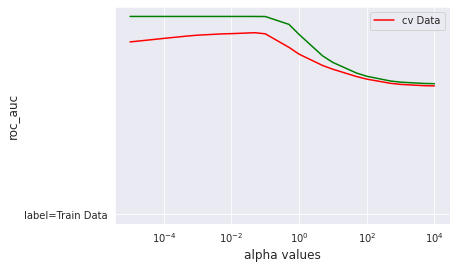

****************************************************************************************************


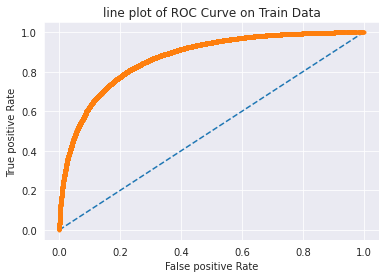

****************************************************************************************************


In [46]:
best_alpha_idf= Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)

AUC Score 0.9191049516137699
**********************************************************************


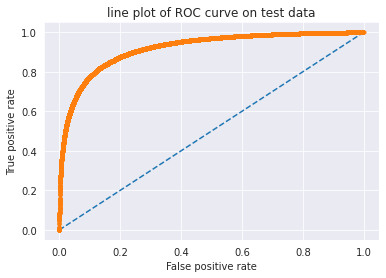

macro f1_score for data : 0.7545560070179373
micro f1_score for data: 0.8934904349417941
hamming loss for data: 0.10650956505820582
**********************************************************************
precision recall report for data:
               precision    recall  f1-score   support

           0       0.78      0.45      0.57     18834
           1       0.91      0.98      0.94    101343

    accuracy                           0.89    120177
   macro avg       0.84      0.71      0.75    120177
weighted avg       0.88      0.89      0.88    120177

**********************************************************************


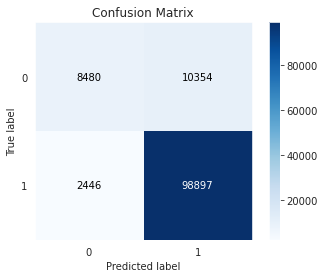

In [47]:
NB_tfidf,roc_auc_idf = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_idf)

In [48]:
Important_features(TfIdf,NB_tfidf)

,Pos_words,Pos_Importance,Neg_Importance,Neg_words
0,great,-6.479760,-6.947918,like
1,good,-6.554526,-7.050162,product
2,like,-6.600003,-7.086983,taste
3,coffee,-6.667178,-7.252990,would
4,tea,-6.671024,-7.343074,coffee
...,...,...,...,...
4053494,indeed coat,-16.967938,-15.874563,person portions
4053495,indeed climbed,-16.967938,-15.874563,person pork
4053496,indeed classic,-16.967938,-15.874563,person popped
4053497,indeed claimed,-16.967938,-15.874563,person popcorn


In [49]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=1)
x_resampled,y_resampled=smote.fit_resample(x_train,y_train)

In [50]:
y_resampled.value_counts()

1    205718
0    205718
Name: Score, dtype: int64

In [51]:
#resplitting the data
x_tr,x_cv,x_test,y_tr,y_test,y_cv,x_train,y_train=Split_data(x_resampled,y_resampled)

In [52]:
x_cv

<90969x4053499 sparse matrix of type '<class 'numpy.float64'>'
	with 7761529 stored elements in Compressed Sparse Row format>

In [53]:
y_cv

169387    1
11109     1
126778    1
309983    0
242284    1
         ..
69946     1
58329     1
50672     1
163368    1
173088    1
Name: Score, Length: 90969, dtype: int64

In [54]:
print('x_resampled,y_resampled',x_resampled.shape,y_resampled.shape)
print('x_cv,y_cv',x_cv.shape,y_cv.shape)
print('x_train,y_train',x_train.shape,y_train.shape)
print('x_tr,y_tr',x_tr.shape,y_tr.shape)

x_resampled,y_resampled (411436, 4053499) (411436,)
x_cv,y_cv (90969, 4053499) (90969,)
x_train,y_train (275662, 4053499) (275662,)
x_tr,y_tr (184693, 4053499) (184693,)


In [55]:
x_tr,x_cv,x_test=Normalization(x_tr,x_cv,x_test)

Train Data Size (184693, 4053499)
CV data Size (90969, 4053499)
Test Data Size (135774, 4053499)


10000 -----> 0.9242592723780663
5000 -----> 0.9263266987108559
1000 -----> 0.9358002474460279
500 -----> 0.9414152031612765
100 -----> 0.9553068112781855
50 -----> 0.9613387956913182
10 -----> 0.9753323089990988
5 -----> 0.9810654886569681
1 -----> 0.9913514888766023
0.5 -----> 0.9939161663301611
0.1 -----> 0.9964713768775285
0.05 -----> 0.9967340788114231
0.01 -----> 0.9966473467727265
0.005 -----> 0.9964900254984558
0.001 -----> 0.9960659806073947
0.0005 -----> 0.9958800154767505
0.0001 -----> 0.9954669987942549
5e-05 -----> 0.9953012561546709
1e-05 -----> 0.9949511481151567
****************************************************************************************************

 Best alpha Value0.05 with highest roc+auc_score is0.9967340788114231
****************************************************************************************************


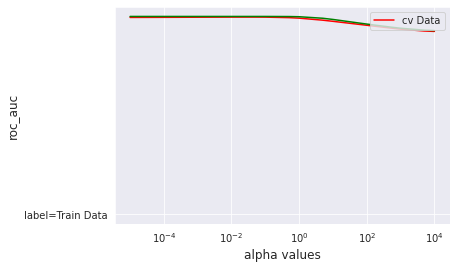

****************************************************************************************************


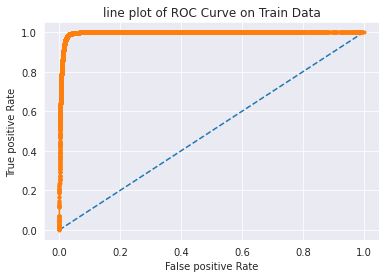

****************************************************************************************************


In [56]:
best_alpha_idf=Multinomial_NB(x_tr,x_cv,y_tr,y_cv)

AUC Score 0.9969218007697774
**********************************************************************


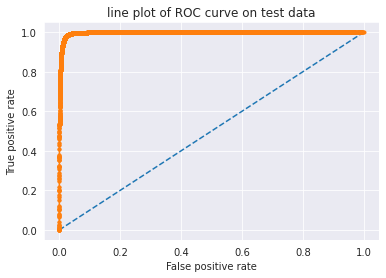

macro f1_score for data : 0.9681678765594572
micro f1_score for data: 0.9681750556071118
hamming loss for data: 0.03182494439288818
**********************************************************************
precision recall report for data:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     67641
           1       0.99      0.95      0.97     68133

    accuracy                           0.97    135774
   macro avg       0.97      0.97      0.97    135774
weighted avg       0.97      0.97      0.97    135774

**********************************************************************


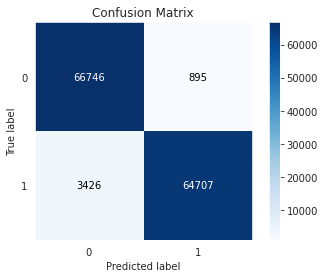

In [57]:
NB_tfidf,roc_auc_idf=Testing_model(x_tr,y_tr,x_test,y_test,best_alpha_idf)

In [ ]:
Important_features(TfIdf, NB_tfidf)

In [ ]:
from prettytable import PrettyTable

x=PrettyTable()
x.field_names=["Vectorizer","Model","Hyperameter(alpha)","Test Auc Score"]

################
x.add_row(["BOW","MultinomialNB",best_alpha_bow,roc_auc_bow])
x.add_row(["Tf-Idf","MultinomialNB",best_alpha_idf, roc_auc_idf])

##
from IPython.display import Markdown, display
def printmd(string):
  display(Markdown(string))
##
printmd('****Final Conclusion for MultiNomialNB Model:****')
print(x)

In [ ]:
review="""The war in Ukraine in particular and the world's geopolitical instability in general is causing a tremendous increase in the cost of living that was already unbareable. The direct effects of this situation can be observe on the prices of gas at gas stations which inturn leads to an increase in the prices of all other goods. A mind blowing effect of this is the skyrocketing of housing prices and rentals whish will at this pace continue to incease in the next decade. I will personally love to return to the initial stage ,if not have to cost of living reduced."""
print("Prediction using BOW:", Individual_prediction(BOW,NB_bow,review))
print("Prediction using TF-Idf:", Individual_prediction(TfIdf, NB_tfidf,review))